<a href="https://colab.research.google.com/github/Anidafio/4105_hw5/blob/main/hw5_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.optim as optim
#In[2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_un = [((float(i)-min(t_u))/(max(t_u)-min(t_u))) for i in t_u]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = torch.tensor(t_un)
#t_un = 0.01 * t_u
t_un

tensor([0.2313, 0.5674, 0.6057, 1.0000, 0.5740, 0.4509, 0.2013, 0.0000, 0.4426,
        0.6423, 0.7754])

In [8]:
def model(t_u, w2, w1, b):
  return w2*t_u**2 + w1*t_u + b
#def model(t_u, w, b):
#  return w*t_u + b

In [9]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [10]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs+1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch%500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

In [11]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c
)

Epoch 500, Loss 2.248228
Epoch 1000, Loss 2.162626
Epoch 1500, Loss 2.123548
Epoch 2000, Loss 2.105707
Epoch 2500, Loss 2.097563
Epoch 3000, Loss 2.093844
Epoch 3500, Loss 2.092146
Epoch 4000, Loss 2.091372
Epoch 4500, Loss 2.091018
Epoch 5000, Loss 2.090856


tensor([10.3515, 22.1651, -3.8814], requires_grad=True)

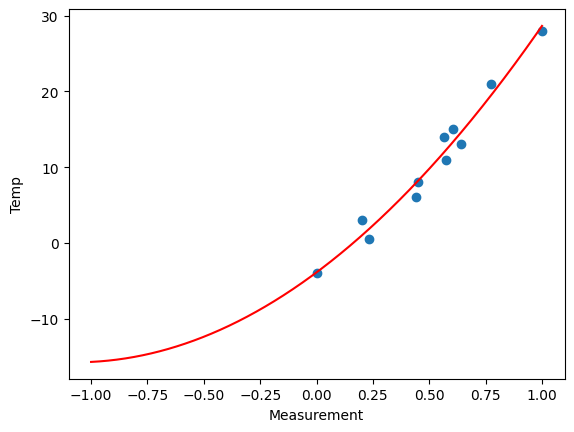

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(t_un, t_c)
x = np.linspace(-1, 1, 1000)
y = y = params.detach().numpy()[0]*x**2 + params.detach().numpy()[1]*x + params.detach().numpy()[2]
plt.xlabel('Measurement')
plt.ylabel('Temp')
plt.plot(x,y, color = 'red')